<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Supervised_Learning/Machine%20Learning%20with%20Tree-Based%20Models%20in%20Python/1_Classification_and_Regression_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification and Regression Trees

Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, you'll be introduced to the CART algorithm.

# Decision tree for classification

1. Decision-Tree for Classification
Hi! My name is Elie Kawerk, I'm a Data Scientist and I'll be your instructor. In this course, you'll be learning about tree-based models for classification and regression.

2. Course Overview
In chapter 1, you'll be introduced to a set of supervised learning models known as Classification-And-Regression-Tree or CART. In chapter 2, you'll understand the notions of bias-variance trade-off and model ensembling. Chapter 3 introduces you to Bagging and Random Forests. Chapter 4 deals with boosting, specifically with AdaBoost and Gradient Boosting. Finally in chapter 5, you'll understand how to get the most out of your models through hyperparameter-tuning.

3. Classification-tree
Given a labeled dataset, a classification tree learns a sequence of if-else questions about individual features in order to infer the labels. In contrast to linear models, trees are able to capture non-linear relationships between features and labels. In addition, trees don't require the features to be on the same scale through standardization for example.

4. Breast Cancer Dataset in 2D
To understand trees more concretely, we'll try to predict whether a tumor is malignant or benign in the Wisconsin Breast Cancer dataset using only 2 features. The figure here shows a scatterplot of two cancerous cell features with malignant-tumors in blue and benign-tumors in red.

5. Decision-tree Diagram
When a classification tree is trained on this dataset, the tree learns a sequence of if-else questions with each question involving one feature and one split-point. Take a look at the tree diagram here. At the top, the tree asks whether the concave-points mean of an instance is <= 0-point-051. If it is, the instance traverses the True branch; otherwise, it traverses the False branch. Similarly, the instance keeps traversing the internal branches until it reaches an end. The label of the instance is then predicted to be that of the prevailing class at that end. The maximum number of branches separating the top from an extreme-end is known as the maximum depth which is equal to 2 here.

6. Classification-tree in scikit-learn
Now that you know what a classification tree is, let's fit one with scikit-learn. First, import DecisionTreeClassifier from sklearn.tree as shown in line 1. Also, import the functions train_test_split() from sklearn.model_selection and accuracy_score() from sklearn.metrics. In order to obtain an unbiased estimate of a model's performance, you must evaluate it on an unseen test set. To do so, first split the data into 80% train and 20% test using train_test_split(). Set the parameter stratify to y in order for the train and test sets to have the same proportion of class labels as the unsplit dataset. You can now use DecisionTreeClassifier() to instantiate a tree classifier, dt with a maximum depth of 2 by setting the parameter max_depth to 2. Note that the parameter random_state is set to 1 for reproducibility.

7. Classification-tree in scikit-learn
Then call the fit method on dt and pass X_train and y_train. To predict the labels of the test-set, call the predict method on dt. Finally print the accuracy of the test set using accuracy_score(). To understand the tree's predictions more concretely, let's see how it classifies instances in the feature-space.

8. Decision Regions
A classification-model divides the feature-space into regions where all instances in one region are assigned to only one class-label. These regions are known as decision-regions. Decision-regions are separated by surfaces called decision-boundaries. The figure here shows the decision-regions of a linear-classifier. Note how the boundary is a straight-line.

9. Decision Regions: CART vs. Linear Model
In contrast, as shown here on the right, a classification-tree produces rectangular decision-regions in the feature-space. This happens because at each split made by the tree, only one feature is involved.

10. Let's practice!
Now let's practice!

# Train your first classification tree

In this exercise you'll work with the [Wisconsin Breast Cancer Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called SEED which is set to 1.

Instructions

1. Import DecisionTreeClassifier from sklearn.tree.

2. Instantiate a DecisionTreeClassifier dt of maximum depth equal to 6.

3. Fit dt to the training set.

4. Predict the test set labels and assign the result to y_pred.

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

'''
<script.py> output:
    [0 0 0 1 0]
'''

Conclusion:

Awesome! You've just trained your first classification tree! You can see the first five predictions made by the fitted tree on the test set in the console. In the next exercise, you'll evaluate the tree's performance on the entire test set.

# Evaluate the classification tree

Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

The trained model dt from the previous exercise is loaded in your workspace along with the test set features matrix X_test and the array of labels y_test.

Instructions

1. Import the function accuracy_score from sklearn.metrics.

2. Predict the test set labels and assign the obtained array to y_pred.

3. Evaluate the test set accuracy score of dt by calling accuracy_score() and assign the value to acc.

In [ ]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

'''
<script.py> output:
    Test set accuracy: 0.89
'''

ConclusionL:

Not bad! Using only two features, your tree was able to achieve an accuracy of 89%!

# Logistic regression vs classification tree

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

We have written a custom function called `plot_labeled_decision_regions()` that you can use to plot the decision regions of a list containing two trained classifiers. You can type `help(plot_labeled_decision_regions)` in the IPython shell to learn more about this function.

X_train, X_test, y_train, y_test, the model dt that you've trained in an earlier exercise , as well as the function plot_labeled_decision_regions() are available in your workspace.

Instructions

1. Import LogisticRegression from sklearn.linear_model.

2. Instantiate a LogisticRegression model and assign it to logreg.

3. Fit logreg to the training set.

4. Review the plot generated by plot_labeled_decision_regions().

In [ ]:
'''
In [2]:
help(plot_labeled_decision_regions)
Help on function plot_labeled_decision_regions in module __main__:

plot_labeled_decision_regions(X, y, models)
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers
'''

# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

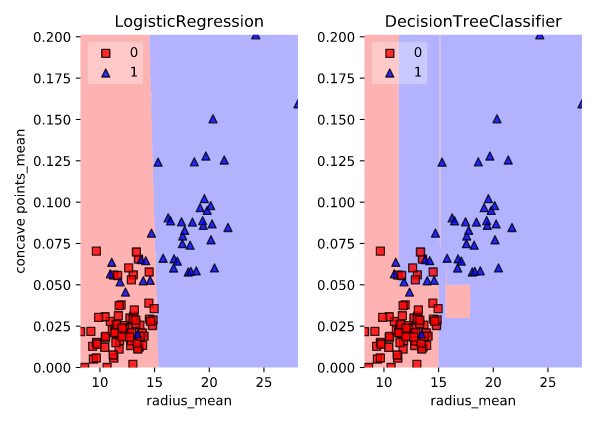

Conclusion

Great work! Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

# Classification tree Learning

1. Classification-Tree Learning
Welcome back! In this video, you'll examine how a classification-tree learns from data.

2. Building Blocks of a Decision-Tree
Let's first start by defining some terms. A decision-tree is a data-structure consisting of a hierarchy of individual units called nodes. A node is a point that involves either a question or a prediction.

3. Building Blocks of a Decision-Tree
The root is the node at which the decision-tree starts growing. It has no parent node and involves a question that gives rise to 2 children nodes through two branches. An internal node is a node that has a parent. It also involves a question that gives rise to 2 children nodes. Finally, a node that has no children is called a leaf. A leaf has one parent node and involves no questions. It's where a prediction is made. Recall that when a classification tree is trained on a labeled dataset, the tree learns patterns from the features in such a way to produce the purest leafs. In other words the tree is trained in such a way so that, in each leaf, one class-label is predominant.

4. Prediction
In the tree diagram shown here, consider the case where an instance traverses the tree to reach the leaf on the left. In this leaf, there are 257 instances classified as benign and 7 instances classified as malignant. As a result, the tree's prediction for this instance would be: 'benign'. In order to understand how a classification tree produces the purest leafs possible, let's first define the concept of information gain.

5. Information Gain (IG)
The nodes of a classification tree are grown recursively; in other words, the obtention of an internal node or a leaf depends on the state of its predecessors. To produce the purest leafs possible, at each node, a tree asks a question involving one feature f and a split-point sp. But how does it know which feature and which split-point to pick? It does so by maximizing Information gain! The tree considers that every node contains information and aims at maximizing the Information Gain obtained after each split. Consider the case where a node with N samples is split into a left-node with Nleft samples and a right-node with Nright samples.

6. Information Gain (IG)
The information gain for such split is given by the formula shown here. A question that you may have in mind here is: 'What criterion is used to measure the impurity of a node?' Well, there are different criteria you can use among which are the gini-index and entropy. Now that you know what is Information gain, let's describe how a classification tree learns.

7. Classification-Tree Learning
When an unconstrained tree is trained, the nodes are grown recursively. In other words, a node exists based on the state of its predecessors. At a non-leaf node, the data is split based on feature f and split-point sp in such a way to maximize information gain. If the information gain obtained by splitting a node is null, the node is declared a leaf. Keep in mind that these rules are for unconstrained trees. If you constrain the maximum depth of a tree to 2 for example, all nodes having a depth of 2 will be declared leafs even if the information gain obtained by splitting such nodes is not null.

8. Information Criterion in scikit-learn (Breast Cancer dataset)
Revisiting the 2D breast-cancer dataset from the previous lesson, you can set the information criterion of dt to the gini-index by setting the criterion parameter to 'gini' as shown on the last line here.

9. Information Criterion in scikit-learn
Now fit dt to the training set and predict the test set labels. Then determine dt's test set accuracy which evaluates to about 92%.

10. Let's practice!
Now it's your turn to practice.

# Growing a classification tree

In the video, you saw that the growth of an unconstrained classification tree followed a few simple rules. Which of the following is not one of these rules?

Possible Answers

- The existence of a node depends on the state of its predecessors.
 - Incorrect! Since nodes are grown recursively, the existence of a node does depend on the state of its predecessors.

- The impurity of a node can be determined using different criteria such as entropy and the gini-index.
 - Not quite true! The impurity of a node can be measured not only using entropy or the gini-index but also with other criteria such as the misclassification rate.

- When the information gain resulting from splitting a node is null, the node is declared as a leaf.
 - Not quite true! When a split results in a zero information gain, the tree isn't learning patterns anymore and the node is declared as a leaf.

- When an internal node is split, the split is performed in such a way so that information gain is minimized.
 - Absolutely so! It's quite the contrary! Actually, splitting an internal node always involves maximizing information gain!


# Using entropy as a criterion

In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

X_train as well as the array of labels y_train are available in your workspace.

Instructions

1. Import DecisionTreeClassifier from sklearn.tree.

2. Instantiate a DecisionTreeClassifier dt_entropy with a maximum depth of 8.

3. Set the information criterion to 'entropy'.

4. Fit dt_entropy on the training set.

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

Conclusion

Wonderful! In the next exercise, you'll compare the accuracy of dt_entropy to the accuracy of a another tree trained using the gini-index as the information criterion.

# Entropy vs Gini index

In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy of another tree named dt_gini. The tree dt_gini was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword 'gini'.

X_test, y_test, dt_entropy, as well as accuracy_gini which corresponds to the test set accuracy achieved by dt_gini are available in your workspace.

Instructions

1. Import accuracy_score from sklearn.metrics.

2. Predict the test set labels of dt_entropy and assign the result to y_pred.

3. Evaluate the test set accuracy of dt_entropy and assign the result to accuracy_entropy.

4. Review accuracy_entropy and accuracy_gini.

In [ ]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

'''
<script.py> output:
    Accuracy achieved by using entropy:  0.929824561404
    Accuracy achieved by using the gini index:  0.929824561404
'''

Conclusion

Nice work! Notice how the two models achieve exactly the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.

# Decision tree for regression

1. Decision-Tree for Regression
Welcome back! In this video, you'll learn how to train a decision tree for a regression problem. Recall that in regression, the target variable is continuous. In other words, the output of your model is a real value.

2. Auto-mpg Dataset
Let's motivate our discussion of regression by introducing the automobile miles-per-gallon dataset from the UCI Machine Learning Repository. This dataset consists of 6 features corresponding to the characteristics of a car and a continuous target variable labeled mpg which stands for miles-per-gallon. Our task is to predict the mpg consumption of a car given these six features. To simplify the problem, here the analysis is restricted to only one feature corresponding to the displacement of a car. This feature is denoted by displ.

3. Auto-mpg with one feature
A 2D scatter plot of mpg versus displ shows that the mpg-consumption decreases nonlinearly with displacement. Note that linear models such as linear regression would not be able to capture such a non-linear trend. Let's see how you can train a decision tree with scikit-learn to solve this regression problem.

4. Regression-Tree in scikit-learn
Note that the features X and the labels y are already loaded in the environment. First, import DecisionTreeRegressor from sklearn-dot-tree and the functions train_test_split() from sklearn-dot-model_selection and mean_squared_error as MSE() from sklearn-dot-metrics. Then, split the data into 80%-train and 20%-test using train_test_split. You can now instantiate the DecisionTreeRegressor() with a maximum depth of 4 by setting the parameter max_depth to 4. In addition, set the parameter min_sample_leaf to 0-dot-1 to impose a stopping condition in which each leaf has to contain at least 10% of the training data.

5. Regression-Tree in scikit-learn
Now fit dt to the training set and predict the test set labels. To obtain the root-mean-squared-error of your model on the test-set; proceed as follows: - first, evaluate the mean-squared error, - then, raise the obtained value to the power 1/2. Finally, print dt's test set rmse to obtain a value of 5-dot-1.

6. Information Criterion for Regression-Tree
Here, it's important to note that, when a regression tree is trained on a dataset, the impurity of a node is measured using the mean-squared error of the targets in that node. This means that the regression tree tries to find the splits that produce leafs where in each leaf the target values are on average, the closest possible to the mean-value of the labels in that particular leaf.

7. Prediction
As a new instance traverses the tree and reaches a certain leaf, its target-variable 'y' is computed as the average of the target-variables contained in that leaf as shown in this formula.

8. Linear Regression vs. Regression-Tree
To highlight the importance of the flexibility of regression trees, take a look at this figure. On the left we have a scatter plot of the data in blue along with the predictions of a linear regression model shown in black. The linear model fails to capture the non-linear trend exhibited by the data. On the right, we have the same scatter plot along with a red line corresponding to the predictions of the regression tree that you trained earlier. The regression tree shows a greater flexibility and is able to capture the non-linearity, though not fully. In the next chapter, you'll aggregate the predictions of a set of trees that are trained differently to obtain better results.

9. Let's practice!
Now it's your turn to practice.

# Train your first regression tree

In this exercise, you'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the [auto-mpg dataset](https://www.kaggle.com/uciml/autompg-dataset) using all the six available features.

The dataset is processed for you and is split to 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

Instructions

1. Import DecisionTreeRegressor from sklearn.tree.

2. Instantiate a DecisionTreeRegressor dt with maximum depth 8 and min_samples_leaf set to 0.13.

3. Fit dt to the training set.

In [ ]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

Conclusion

Great work! In the next exercise, you'll evaluate dt's performance on the test set.

# Evaluate the regression tree

In this exercise, you will evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

The features matrix X_test, the array y_test, as well as the decision tree regressor dt that you trained in the previous exercise are available in your workspace.

Instructions

1. Import the function mean_squared_error as MSE from sklearn.metrics.

2. Predict the test set labels and assign the output to y_pred.

3. Compute the test set MSE by calling MSE and assign the result to mse_dt.

4. Compute the test set RMSE and assign it to rmse_dt.

In [ ]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

'''
<script.py> output:
    Test set RMSE of dt: 4.37
'''

Conclusion

Great work! In the next exercise, you'll compare the test-set RMSE of dt to that of a linear regression model trained on the same dataset.

# Linear regression vs regression tree

In this exercise, you'll compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as dt.

The features matrix X_test, the array of labels y_test, the trained linear regression model lr, mean_squared_error function which was imported under the alias MSE and rmse_dt from the previous exercise are available in your workspace.

Instructions

1. Predict test set labels using the linear regression model (lr) and assign the result to y_pred_lr.

2. Compute the test set MSE and assign the result to mse_lr.

3. Compute the test set RMSE and assign the result to rmse_lr.

In [ ]:
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

'''
<script.py> output:
    Linear Regression test set RMSE: 5.10
    Regression Tree test set RMSE: 4.37
'''

Conclusion

Awesome! You're on your way to master decision trees.